In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [2]:
from spectra_analysis.preprocessing import read_spectra
from spectra_analysis.plotting import plot_spectra, plot_spectra_by_type, plot_cm, plot_regression
from spectra_analysis.regression import regression_experiment, fit_params, transform

### IO: Reading and preprocess the data

We can define a function which will read the data and process them.

In [3]:
# read the frequency and get a pandas serie
frequency = pd.read_csv('data/freq.csv')['freqs']

# read all data for training
filenames = ['data/spectra_{}.csv'.format(i)
             for i in range(4)]

spectra, concentration, molecule = [], [], []
for filename in filenames:
    spectra_file, concentration_file, molecule_file = read_spectra(filename)
    spectra.append(spectra_file)
    concentration.append(concentration_file)
    molecule.append(molecule_file)

# Concatenate in single DataFrame and Serie
spectra = pd.concat(spectra)
concentration = pd.concat(concentration)
molecule = pd.concat(molecule)

### Plot helper functions

We can create two functions: (i) to plot all spectra and (ii) plot the mean spectra with the std intervals.
We will make a "private" function which will be used by both plot types.

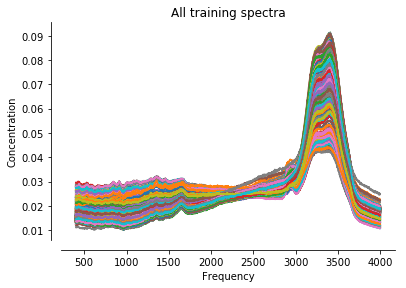

In [4]:
plot_spectra(frequency, spectra, 'All training spectra')

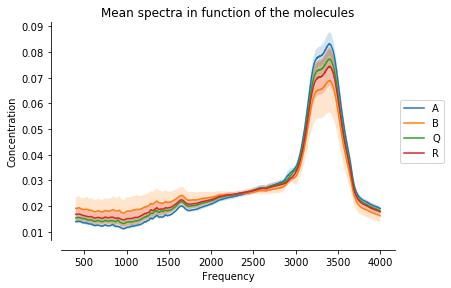

In [5]:
plot_spectra_by_type(frequency, spectra, molecule,
                     'Mean spectra in function of the molecules')

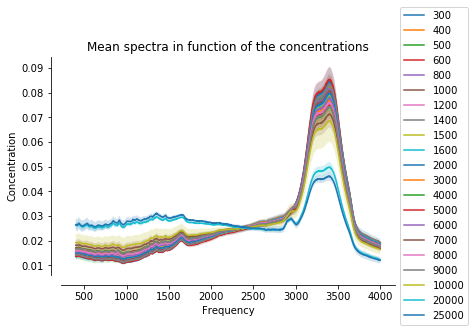

In [6]:
plot_spectra_by_type(frequency, spectra, concentration,
                     'Mean spectra in function of the concentrations')

### Reusability for new data:

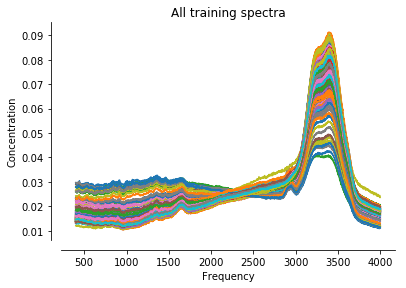

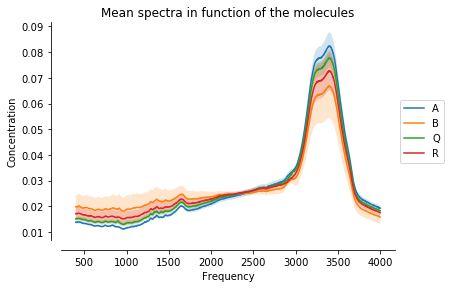

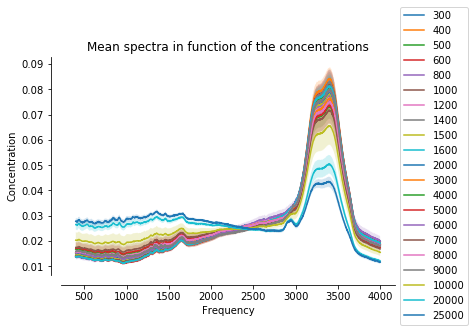

In [7]:
spectra_test, concentration_test, molecule_test = read_spectra('data/spectra_4.csv')

plot_spectra(frequency, spectra_test,
             'All training spectra')
plot_spectra_by_type(frequency, spectra_test, molecule_test,
                     'Mean spectra in function of the molecules')
plot_spectra_by_type(frequency, spectra_test, concentration_test,
                     'Mean spectra in function of the concentrations')

## Training and testing a machine learning model for classification

Accuracy score: 0.83
Accuracy score: 0.93


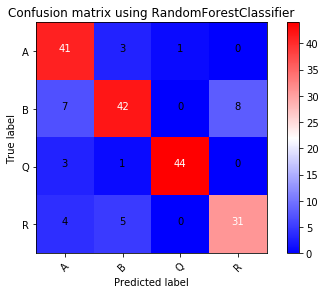

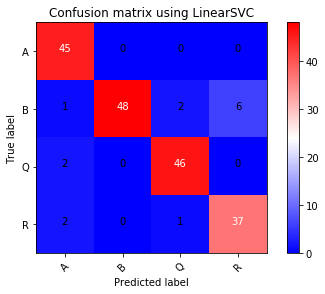

In [8]:
for clf in [RandomForestClassifier(random_state=0),
            LinearSVC(random_state=0)]:
    
    pipeline = make_pipeline(StandardScaler(),
                             PCA(n_components=100, random_state=0),
                             clf)
    y_pred = pipeline.fit(spectra, molecule).predict(spectra_test)
    plot_cm(confusion_matrix(molecule_test, y_pred),
            pipeline.classes_,
            'Confusion matrix using {}'.format(clf.__class__.__name__))
    print('Accuracy score: {0:.2f}'.format(pipeline.score(spectra_test,
                                                          molecule_test)))

## Training and testing a machine learning model for regression

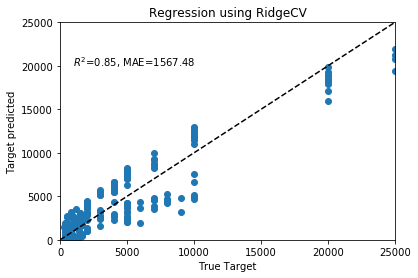

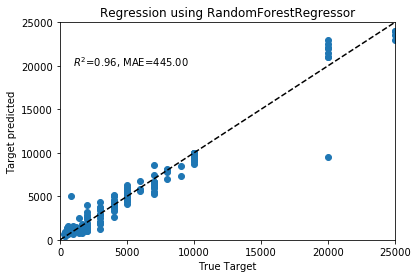

In [9]:
regression_experiment(spectra, spectra_test,
                      concentration, concentration_test)

In [10]:
# compute the statistics on the training data
med, var = fit_params(spectra)
# transform the training and testing data
spectra_scaled = transform(spectra, med, var)
spectra_test_scaled = transform(spectra_test, med, var)

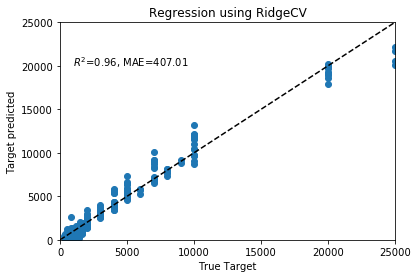

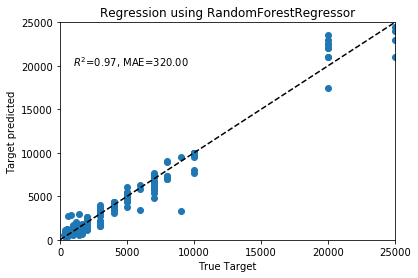

In [11]:
regression_experiment(spectra_scaled, spectra_test_scaled,
                      concentration, concentration_test)